In [2180]:
import pandas as pd
import numpy as np

In [2181]:
df = pd.read_csv(r"C:\Users\vbish\Downloads\archive (1).zip")

In [2182]:
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [2183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [2184]:
df.isnull().sum()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

In [2185]:
df.shape

(1259, 27)

In [2186]:
# Find the most frequent state for each country
state_imputation = df.groupby('Country')['state'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else 'Unknown')

# Impute missing values in 'state' based on the country
for Country, state in state_imputation.items():
    df.loc[df['Country'] == Country, 'state'] = df.loc[df['Country'] == Country, 'state'].fillna(state)


In [2187]:
# Fill missing values in 'self_employed' with the most frequent value (mode)
df['self_employed'] = df['self_employed'].fillna(df['self_employed'].mode()[0])

In [2188]:
# filling the missing values in 'work_interfere' with the most frequent value(mode)
df['work_interfere'] = df['work_interfere'].fillna(df['work_interfere'].mode()[0])

In [2189]:
#filling the missing values in 'comments' with 'no comment'
df['comments'] = df['comments'].fillna('no comment')

In [2190]:
df.isnull().sum()

Timestamp                    0
Age                          0
Gender                       0
Country                      0
state                        0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
comments                     0
dtype: int64

In [2191]:
df.dtypes

Timestamp                    object
Age                           int64
Gender                       object
Country                      object
state                        object
self_employed                object
family_history               object
treatment                    object
work_interfere               object
no_employees                 object
remote_work                  object
tech_company                 object
benefits                     object
care_options                 object
wellness_program             object
seek_help                    object
anonymity                    object
leave                        object
mental_health_consequence    object
phys_health_consequence      object
coworkers                    object
supervisor                   object
mental_health_interview      object
phys_health_interview        object
mental_vs_physical           object
obs_consequence              object
comments                     object
dtype: object

In [2192]:
duplicates = df.duplicated()
print(f"Number of duplicate row: {duplicates.sum()}")

Number of duplicate row: 0


In [2193]:
print(df['Gender'].unique())
print(f'number of unique gender: {df['Gender'].nunique()}')

['Female' 'M' 'Male' 'male' 'female' 'm' 'Male-ish' 'maile' 'Trans-female'
 'Cis Female' 'F' 'something kinda male?' 'Cis Male' 'Woman' 'f' 'Mal'
 'Male (CIS)' 'queer/she/they' 'non-binary' 'Femake' 'woman' 'Make' 'Nah'
 'All' 'Enby' 'fluid' 'Genderqueer' 'Female ' 'Androgyne' 'Agender'
 'cis-female/femme' 'Guy (-ish) ^_^' 'male leaning androgynous' 'Male '
 'Man' 'Trans woman' 'msle' 'Neuter' 'Female (trans)' 'queer'
 'Female (cis)' 'Mail' 'cis male' 'A little about you' 'Malr' 'p' 'femail'
 'Cis Man' 'ostensibly male, unsure what that really means']
number of unique gender: 49


In [2194]:
#Inconsistent Formatting in the column 'Gender'
df['Gender'].replace(['Male ', 'male', 'M', 'm', 'Male', 'Cis Male',
                     'Man', 'cis male', 'Mail', 'Male-ish', 'Male (CIS)',
                      'Cis Man', 'msle', 'Malr', 'Mal', 'maile', 'Make',], 'Male', inplace = True)
df['Gender'].replace(['Female ', 'female', 'F', 'f', 'Woman', 'Female',
                     'femail', 'Cis Female', 'cis-female/femme', 'Femake', 'Female (cis)',
                     'woman',], 'Female', inplace = True)
df["Gender"].replace(['Female (trans)', 'queer/she/they', 'non-binary',
                     'fluid', 'queer', 'Androgyne', 'Trans-female', 'male leaning androgynous',
                      'Agender', 'A little about you', 'Nah', 'All',
                      'ostensibly male, unsure what that really means',
                      'Genderqueer', 'Enby', 'p', 'Neuter', 'something kinda male?',
                      'Guy (-ish) ^_^', 'Trans woman',], 'Other', inplace = True)
print(df['Gender'].unique())

['Female' 'Male' 'Other']


C:\Users\vbish\AppData\Local\Temp\ipykernel_4684\721161538.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].replace(['Male ', 'male', 'M', 'm', 'Male', 'Cis Male',


In [2195]:
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,No,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,no comment
1,2014-08-27 11:29:37,44,Male,United States,IN,No,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,no comment
2,2014-08-27 11:29:44,32,Male,Canada,Unknown,No,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,no comment
3,2014-08-27 11:29:46,31,Male,United Kingdom,Unknown,No,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,no comment
4,2014-08-27 11:30:22,31,Male,United States,TX,No,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,no comment


In [2196]:
df['Age'].unique()

array([         37,          44,          32,          31,          33,
                35,          39,          42,          23,          29,
                36,          27,          46,          41,          34,
                30,          40,          38,          50,          24,
                18,          28,          26,          22,          19,
                25,          45,          21,         -29,          43,
                56,          60,          54,         329,          55,
       99999999999,          48,          20,          57,          58,
                47,          62,          51,          65,          49,
             -1726,           5,          53,          61,           8,
                11,          -1,          72])

In [2197]:
df.drop(df[df['Age'] < 0].index, inplace=True)
df.drop(df[df['Age'] > 99].index, inplace=True)
print(df['Age'].unique())

[37 44 32 31 33 35 39 42 23 29 36 27 46 41 34 30 40 38 50 24 18 28 26 22
 19 25 45 21 43 56 60 54 55 48 20 57 58 47 62 51 65 49  5 53 61  8 11 72]


In [2198]:
df.columns

Index(['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')

In [2199]:
df['leave'].unique()

array(['Somewhat easy', "Don't know", 'Somewhat difficult',
       'Very difficult', 'Very easy'], dtype=object)

In [2200]:
df['anonymity'].unique()

array(['Yes', "Don't know", 'No'], dtype=object)

In [2201]:
df['benefits'].unique()

array(['Yes', "Don't know", 'No'], dtype=object)

In [2202]:
df['mental_health_consequence'].unique()

array(['No', 'Maybe', 'Yes'], dtype=object)

In [2203]:
#Creating a composite score for how supportive a workplace is toward mental health.
#EDA
from sklearn.preprocessing import OrdinalEncoder
categories = [
    ['Very difficult', 'Somewhat difficult', "Don't know", 'Somewhat easy', 'Very easy'],  # Leave policy
    ['No', "Don't know", 'Yes'],  # Anonymity
    ['No', "Don't know", 'Yes'],  # Benefits
    ['Yes', 'Maybe', 'No']  # Stigma (lower is worse, higher is better)
]

#select relevent column
cols_to_encode = ['leave', 'anonymity', 'benefits', 'mental_health_consequence']

#apply ordinal encoder
encoder = OrdinalEncoder()
df[cols_to_encode] = encoder.fit_transform(df[cols_to_encode])


#we want all factors (leave, anonymity, benefits) to be between 0 and 2 for fair comparison.
df['leave'] = df['leave'] * (2/df['leave'].max())
df['anonymity'] = df['anonymity'] * (2/df['anonymity'].max())
df['benefits'] = df['benefits'] * (2/df['benefits'].max())
df['mental_health_consequence'] = 2 - df['mental_health_consequence'] # Reverse stigma scoring(problem:'yes' means worst and 'no' means best)

#compute the mental health support score
df['support_score'] = df['leave'] + df['anonymity'] + df['benefits'] - df['mental_health_consequence']

df[['leave', 'anonymity', 'benefits', 'mental_health_consequence', 'support_score']].head()

,leave,anonymity,benefits,mental_health_consequence,support_score
0,1.0,2.0,2.0,1.0,4.0
1,0.0,0.0,0.0,2.0,-2.0
2,0.5,0.0,1.0,1.0,0.5
3,0.5,1.0,1.0,0.0,2.5
4,0.0,0.0,2.0,1.0,1.0


In [2204]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df['support_score'] = scaler.fit_transform(df[['support_score']])

In [2205]:
print(df['support_score'].describe())

count    1.254000e+03
mean    -2.266484e-17
std      1.000399e+00
min     -1.676428e+00
25%     -6.466750e-01
50%     -1.317985e-01
75%      6.405162e-01
max      2.442584e+00
Name: support_score, dtype: float64


In [2206]:
import matplotlib.pyplot as plt
import seaborn as sns

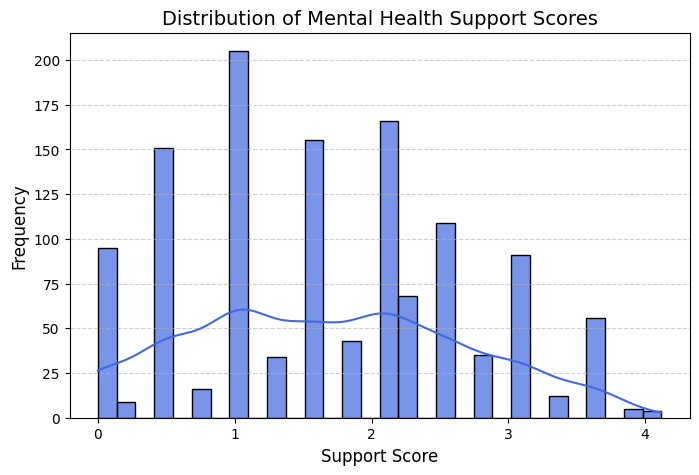

In [2207]:
plt.figure(figsize=(8,5))

df["support_score"] = df["support_score"] - df["support_score"].min()  # Shift to remove negatives

sns.histplot(df["support_score"], bins=30, kde=True, color="royalblue", alpha=0.7)

plt.title("Distribution of Mental Health Support Scores", fontsize=14)
plt.xlabel("Support Score", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

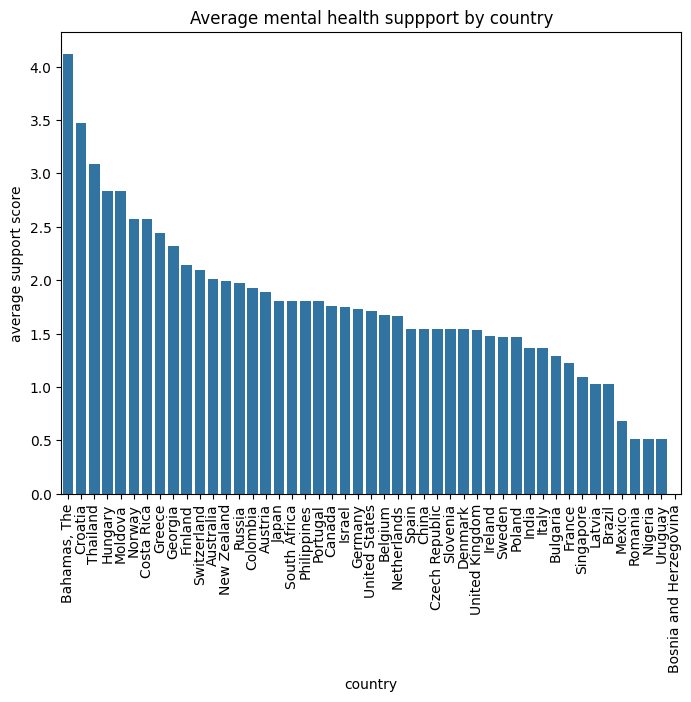

In [2208]:
#bivariate analysis
#comparing support scores by Country: Which countries have the highest/lowest support?
country_avg = df.groupby('Country')['support_score'].mean().sort_values(ascending=False)
plt.figure(figsize=(8,6))
sns.barplot(x=country_avg.index, y=country_avg.values)
plt.title('Average mental health suppport by country')
plt.xlabel('country')
plt.ylabel('average support score')
plt.xticks(rotation=90)
plt.show()

key insight from chart:
1) Bahamas, Croatia, Thailand seem to have the highest support scores
2) Bosnia and Herzegovia, Romania are at the bottom, suggesting weaker workplace mental health support

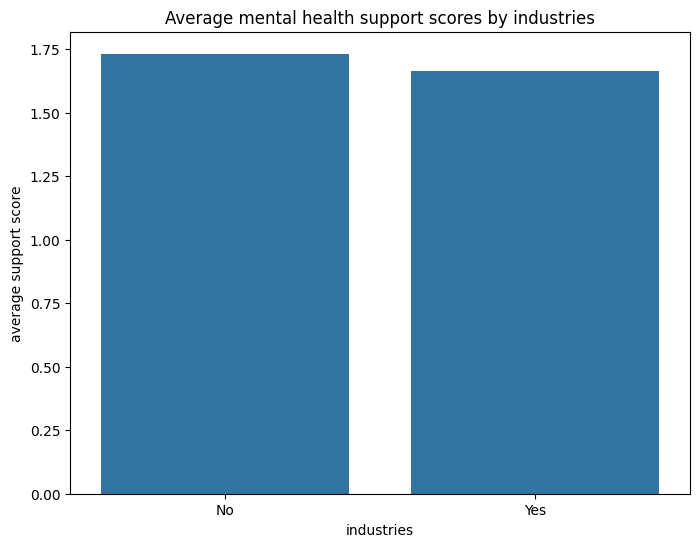

In [2209]:
#comparing mental health support scores by industries: are tech companies better than non-tech?
industries_avg = df.groupby('tech_company')['support_score'].mean().sort_values(ascending=False)
plt.figure(figsize=(8,6))
sns.barplot(x=industries_avg.index, y=industries_avg.values)
plt.title('Average mental health support scores by industries')
plt.xlabel('industries')
plt.ylabel('average support score')
plt.show()

No significant difference: Thos suggests tech and non-tech industries provide similar mental health support.

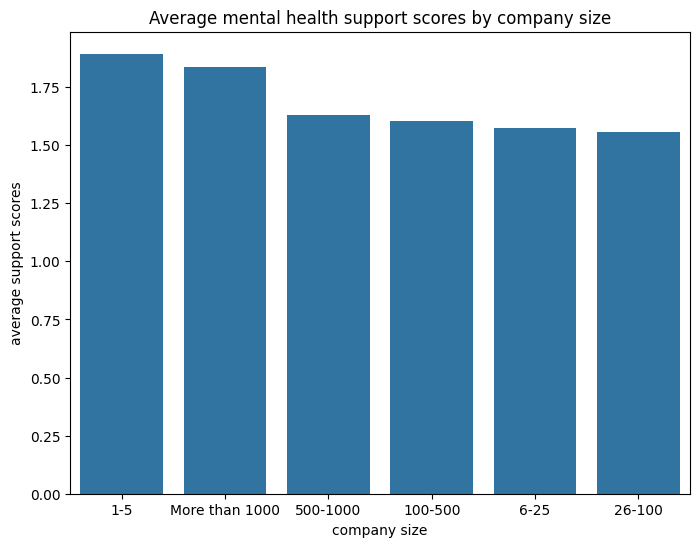

In [2210]:
#Do large companies provide better support
company_size_avg = df.groupby('no_employees')['support_score'].mean().sort_values(ascending=False)
plt.figure(figsize=(8,6))
sns.barplot(x=company_size_avg.index, y=company_size_avg.values)
plt.title('Average mental health support scores by company size')
plt.xlabel('company size')
plt.ylabel('average support scores')
plt.show()

Smallest companies (1-5 employees) have the highest support scores (~3.7).
Very large companies (1000+ employees) also show relatively high scores (~3.6).
Mid-sized companies (6-1000 employees) have lower scores (~3.0 - 3.2).

Possible Explanations:
Small companies → Closer work relationships, better peer support, and direct leadership involvement.
Large companies → More resources, structured mental health programs, and HR policies.
Mid-sized companies → Might lack both personal touch (small firms) and structured support (large firms).

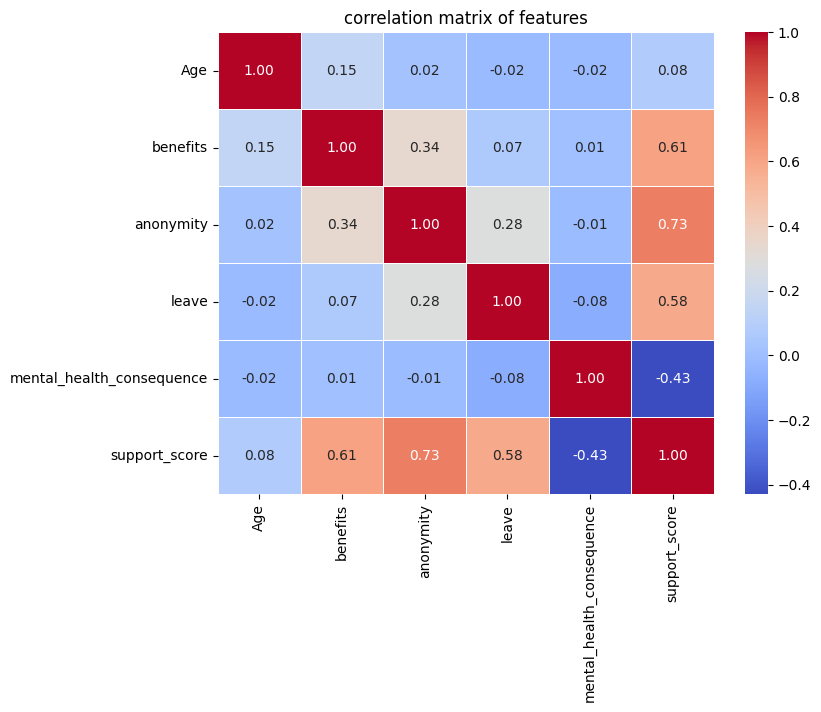

In [2211]:
numeric_df = df.select_dtypes(include=['number'])
corr_matrix = numeric_df.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('correlation matrix of features')
plt.show()

support_score is highly correlated with anonymity (0.73) and benefits (0.61).
This suggests that workplaces with better anonymity policies and benefits tend to have higher mental health support scores.
Since anonymity (0.73) has the highest positive correlation with support_score, companies should ensure that employees feel safe discussing mental health without fear of stigma or exposure.


Actionable Steps:
Implement anonymous reporting systems.
Train HR and managers on confidentiality.
Encourage open mental health discussions without requiring self-identification.

In [2212]:
#state column might not be useful now if country is included
df.drop(columns=['state'], axis=1, inplace=True)

In [2213]:
df.head()

,Timestamp,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments,support_score
0,2014-08-27 11:29:31,37,Female,United States,No,No,Yes,Often,6-25,No,...,1.0,No,Some of them,Yes,No,Maybe,Yes,No,no comment,3.089259
1,2014-08-27 11:29:37,44,Male,United States,No,No,No,Rarely,More than 1000,No,...,2.0,No,No,No,No,No,Don't know,No,no comment,0.000000
2,2014-08-27 11:29:44,32,Male,Canada,No,No,No,Rarely,6-25,No,...,1.0,No,Yes,Yes,Yes,Yes,No,No,no comment,1.287191
3,2014-08-27 11:29:46,31,Male,United Kingdom,No,Yes,Yes,Often,26-100,No,...,0.0,Yes,Some of them,No,Maybe,Maybe,No,Yes,no comment,2.316944
4,2014-08-27 11:30:22,31,Male,United States,No,No,No,Never,100-500,Yes,...,1.0,No,Some of them,Yes,Yes,Yes,Don't know,No,no comment,1.544629


In [2214]:
from sklearn.preprocessing import LabelEncoder
binary_columns = ['family_history', 'treatment', 'obs_consequence']
le = LabelEncoder()
for col in binary_columns:
    df[col] = le.fit_transform(df[col])

In [2215]:
from sklearn.preprocessing import OrdinalEncoder
company_size_order = ['1-5', '6-25', '26-100', '100-500', '500-1000', 'More than 1000']

# Handle missing values (fill with a placeholder or drop)
df['no_employees'].fillna('Unknown', inplace=True) 

ordinal_encoder = OrdinalEncoder(categories=[company_size_order], handle_unknown='use_encoded_value', unknown_value=-1)

df[['no_employees']] = ordinal_encoder.fit_transform(df[['no_employees']])

C:\Users\vbish\AppData\Local\Temp\ipykernel_4684\3566787456.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['no_employees'].fillna('Unknown', inplace=True)


In [2216]:
df['no_employees'] = df['no_employees'].astype(int)
df['obs_consequence'] = df['obs_consequence'].astype(int)

In [2217]:
work_interfere_order = ['Never', 'Rarely', 'Sometimes', 'Often']

ordinal_encoder = OrdinalEncoder(categories=[work_interfere_order])
df['work_interfere'] = ordinal_encoder.fit_transform(df[['work_interfere']])

In [2218]:
df['work_interfere'] = df['work_interfere'].astype(int)

In [2219]:
from sklearn.preprocessing import OneHotEncoder

# Initialize encoder
ohe = OneHotEncoder(sparse_output=False, drop='first')  # drop='first' avoids dummy variable trap

# Reshape `Gender` column to 2D and transform
gender_encoded = ohe.fit_transform(df[['Gender']])

# Convert to DataFrame with proper column names
gender_df = pd.DataFrame(gender_encoded, columns=ohe.get_feature_names_out(['Gender']))

# Concatenate with original DataFrame (drop old `Gender` column)
df = pd.concat([df.drop(columns=['Gender']), gender_df], axis=1)

In [2220]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse_output=False, drop='first')  # Drop first category to avoid redundancy
care_encoded = ohe.fit_transform(df[['care_options']])

# Convert to DataFrame
care_df = pd.DataFrame(care_encoded, columns=ohe.get_feature_names_out(['care_options']))

# Merge with original dataframe
df = pd.concat([df.drop(columns=['care_options']), care_df], axis=1)

In [2221]:
df.head()

,Timestamp,Age,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,phys_health_interview,mental_vs_physical,obs_consequence,comments,support_score,Gender_Male,Gender_Other,care_options_Not sure,care_options_Yes,care_options_nan
0,2014-08-27 11:29:31,37.0,United States,No,0.0,1.0,3.0,1.0,No,Yes,...,Maybe,Yes,0.0,no comment,3.089259,0.0,0.0,1.0,0.0,0.0
1,2014-08-27 11:29:37,44.0,United States,No,0.0,0.0,1.0,5.0,No,No,...,No,Don't know,0.0,no comment,0.000000,1.0,0.0,0.0,0.0,0.0
2,2014-08-27 11:29:44,32.0,Canada,No,0.0,0.0,1.0,1.0,No,Yes,...,Yes,No,0.0,no comment,1.287191,1.0,0.0,0.0,0.0,0.0
3,2014-08-27 11:29:46,31.0,United Kingdom,No,1.0,1.0,3.0,2.0,No,Yes,...,Maybe,No,1.0,no comment,2.316944,1.0,0.0,0.0,1.0,0.0
4,2014-08-27 11:30:22,31.0,United States,No,0.0,0.0,0.0,3.0,Yes,Yes,...,Yes,Don't know,0.0,no comment,1.544629,1.0,0.0,0.0,0.0,0.0


In [2222]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1259 entries, 0 to 1127
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Timestamp                  1254 non-null   object 
 1   Age                        1254 non-null   float64
 2   Country                    1254 non-null   object 
 3   self_employed              1254 non-null   object 
 4   family_history             1254 non-null   float64
 5   treatment                  1254 non-null   float64
 6   work_interfere             1254 non-null   float64
 7   no_employees               1254 non-null   float64
 8   remote_work                1254 non-null   object 
 9   tech_company               1254 non-null   object 
 10  benefits                   1254 non-null   float64
 11  wellness_program           1254 non-null   object 
 12  seek_help                  1254 non-null   object 
 13  anonymity                  1254 non-null   float64
 1

In [2223]:
df.shape

(1259, 30)

In [2224]:
print(df.isna().sum())  # Shows count of missing values per column

Timestamp                    5
Age                          5
Country                      5
self_employed                5
family_history               5
treatment                    5
work_interfere               5
no_employees                 5
remote_work                  5
tech_company                 5
benefits                     5
wellness_program             5
seek_help                    5
anonymity                    5
leave                        5
mental_health_consequence    5
phys_health_consequence      5
coworkers                    5
supervisor                   5
mental_health_interview      5
phys_health_interview        5
mental_vs_physical           5
obs_consequence              5
comments                     5
support_score                5
Gender_Male                  5
Gender_Other                 5
care_options_Not sure        0
care_options_Yes             0
care_options_nan             0
dtype: int64


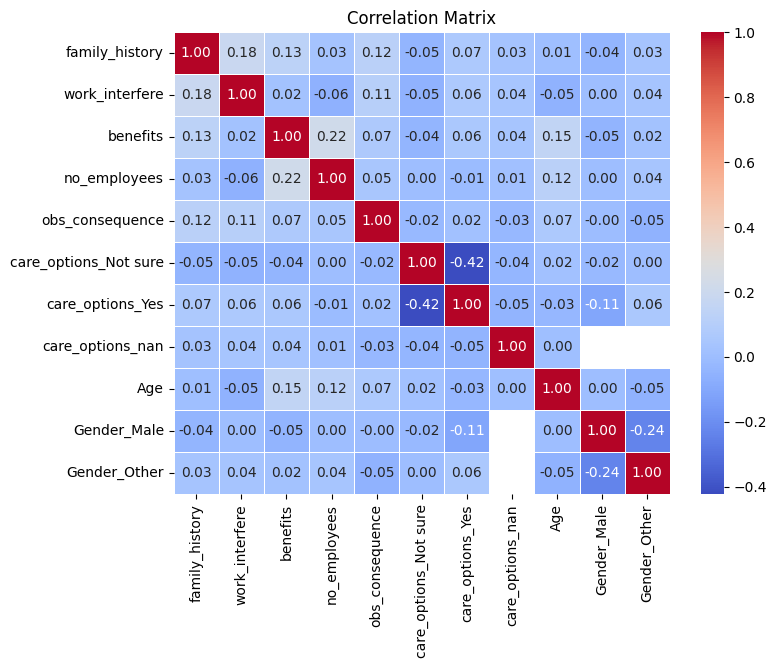

In [2225]:
#STEP 1 CHECKING FOR MULTICOLLINEARITY(CORRELATION MATRIX)

gender_columns = [col for col in df.columns if 'Gender_' in col]  # Find all Gender-related columns
selected_features = ['family_history', 'work_interfere', 'benefits', 'no_employees', 
                     'obs_consequence', 'care_options_Not sure', 'care_options_Yes', 'care_options_nan', 'Age'] + gender_columns
X = df[selected_features]
corr_matrix = X.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


correlation matrix shows that no features have high correlation (all values are close to 0). That means multicollinearity is not an issue, so you don’t need to remove or combine any variables.

In [2226]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Scale only features, NOT target

In [2227]:
from sklearn.impute import SimpleImputer

# Create an imputer (fill NaNs with the mean of the column)
imputer = SimpleImputer(strategy='mean')  # Or try "median" or "most_frequent"

# Apply imputer to X_scaled
X_scaled = imputer.fit_transform(X_scaled)

In [2228]:
df['treatment'].fillna(df['treatment'].mode()[0], inplace=True)

C:\Users\vbish\AppData\Local\Temp\ipykernel_4684\2206286297.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['treatment'].fillna(df['treatment'].mode()[0], inplace=True)


In [2229]:
# Check class distribution
df['treatment'].value_counts(normalize=True)

treatment
1.0    0.506751
0.0    0.493249
Name: proportion, dtype: float64

In [2230]:
from sklearn.decomposition import PCA
# Apply PCA (keeping 2 components for visualization)
pca = PCA(n_components=2)  
pca_data = pca.fit_transform(X_scaled)

# Convert PCA results into a DataFrame
df_pca = pd.DataFrame(pca_data, columns=['PC1', 'PC2'])

# Check how much variance is explained by each component
print(pca.explained_variance_ratio_)


[0.14158551 0.12500811]


In [2231]:
print(np.cumsum(pca.explained_variance_ratio_))

[0.14158551 0.26659361]


In [2232]:
from sklearn.cluster import KMeans
Kmeans = KMeans(n_clusters = 3, random_state =42)
df_pca['Cluster'] = kmeans.fit_predict(df_pca)

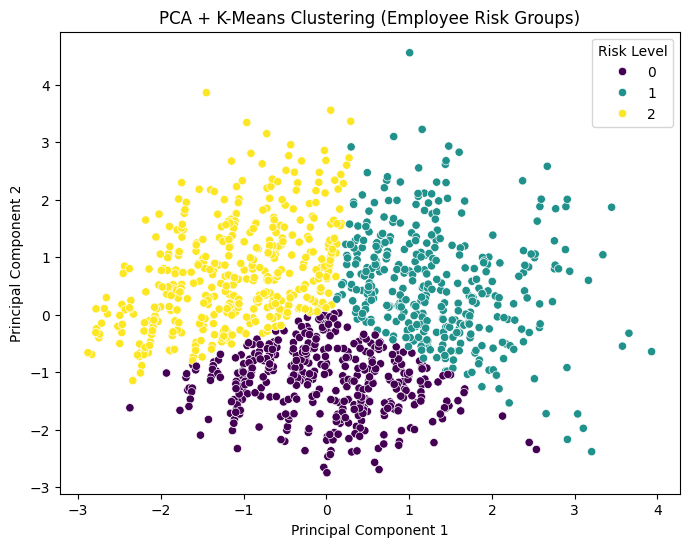

In [2233]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(x=df_pca['PC1'], y=df_pca['PC2'], hue=df_pca['Cluster'], palette='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA + K-Means Clustering (Employee Risk Groups)')
plt.legend(title='Risk Level')
plt.show()

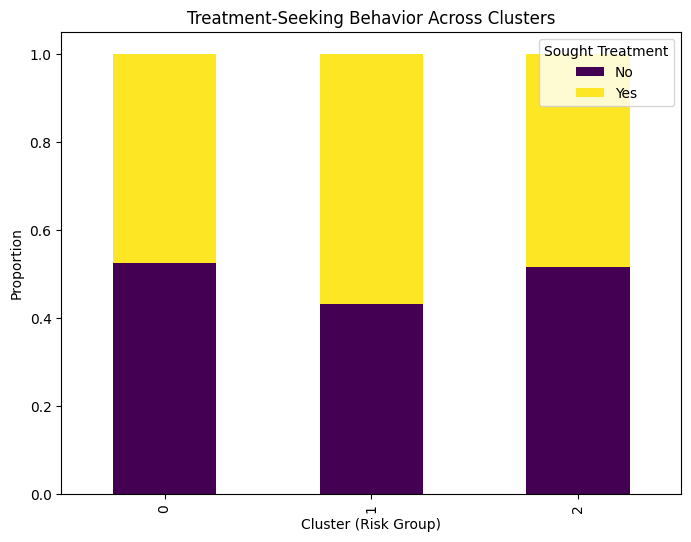

In [2234]:
df['Cluster'] = df_pca['Cluster']

# Analyze treatment-seeking behavior per cluster
treatment_dist = df.groupby('Cluster')['treatment'].value_counts(normalize=True).unstack()
treatment_dist.plot(kind='bar', stacked=True, figsize=(8,6), colormap='viridis')
plt.xlabel('Cluster (Risk Group)')
plt.ylabel('Proportion')
plt.title('Treatment-Seeking Behavior Across Clusters')
plt.legend(title='Sought Treatment', labels=['No', 'Yes'])
plt.show()

In [2235]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Define target variable
y = df['treatment']  # Binary: 0 (No), 1 (Yes)

# Split data into train & test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Get probabilities for each test sample
y_probs = model.predict_proba(X_test)[:, 1]  # Probability of class 1 (seeking treatment)

# Example: Show probabilities of first 10 employees
print(y_probs[:10])


# Model Performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


[0.52602668 0.58158688 0.46696612 0.25216047 0.82899369 0.28731015
 0.85927246 0.42482903 0.44459865 0.22390898]
Accuracy: 0.6825396825396826
              precision    recall  f1-score   support

         0.0       0.68      0.71      0.69       127
         1.0       0.69      0.66      0.67       125

    accuracy                           0.68       252
   macro avg       0.68      0.68      0.68       252
weighted avg       0.68      0.68      0.68       252



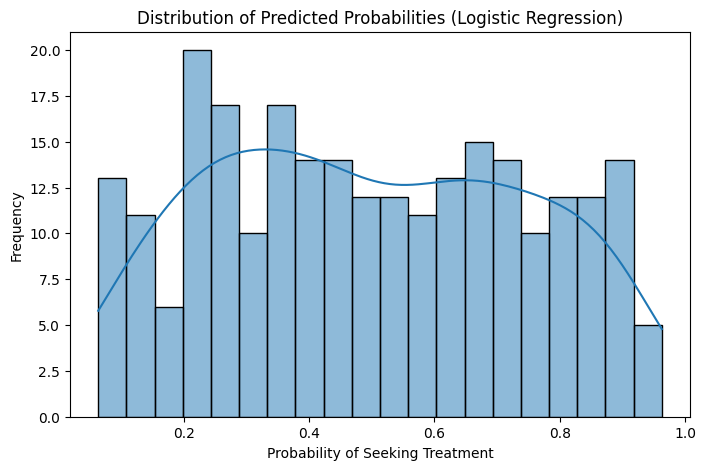

In [2236]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histogram of predicted probabilities
plt.figure(figsize=(8,5))
sns.histplot(y_probs, bins=20, kde=True)
plt.xlabel("Probability of Seeking Treatment")
plt.ylabel("Frequency")
plt.title("Distribution of Predicted Probabilities (Logistic Regression)")
plt.show()

In [2237]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

#initialize the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

#train the model
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.6547619047619048
              precision    recall  f1-score   support

         0.0       0.66      0.65      0.65       127
         1.0       0.65      0.66      0.66       125

    accuracy                           0.65       252
   macro avg       0.65      0.65      0.65       252
weighted avg       0.65      0.65      0.65       252



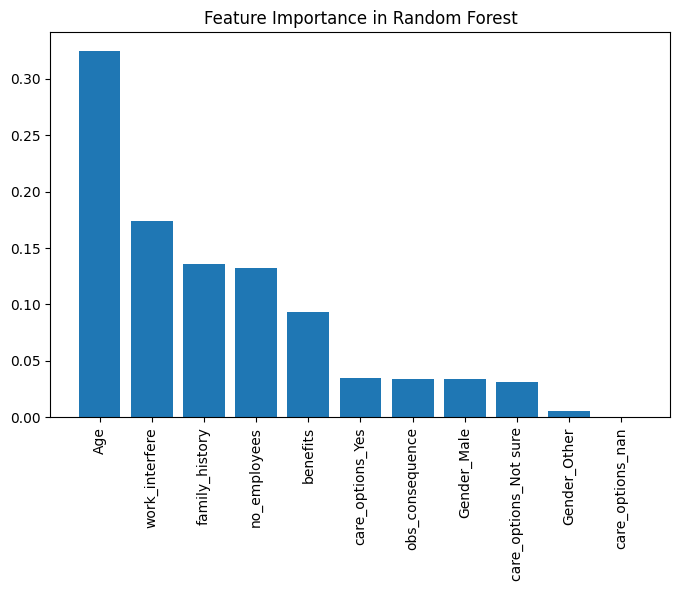

In [2238]:
import numpy as np
importances = rf_model.feature_importances_
feature_names = X.columns
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(8,5))
plt.bar(range(len(indices)), importances[indices], align="center")
plt.xticks(range(len(indices)), [feature_names[i] for i in indices], rotation=90)
plt.title("Feature Importance in Random Forest")
plt.show()

In [2239]:
# Get the indices of columns to keep (removing Gender and obs_consequence)
drop_columns = ['Gender_Male', 'Gender_Other', 'obs_consequence']
keep_indices = [i for i, col in enumerate(df[selected_features].columns) if col not in drop_columns]

# Select only the required features from the already scaled dataset
X_scaled_filtered = X_scaled[:, keep_indices]
# Split data into train & test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled_filtered, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Random Forest Accuracy: 0.6547619047619048
              precision    recall  f1-score   support

         0.0       0.67      0.63      0.65       127
         1.0       0.64      0.68      0.66       125

    accuracy                           0.65       252
   macro avg       0.66      0.65      0.65       252
weighted avg       0.66      0.65      0.65       252



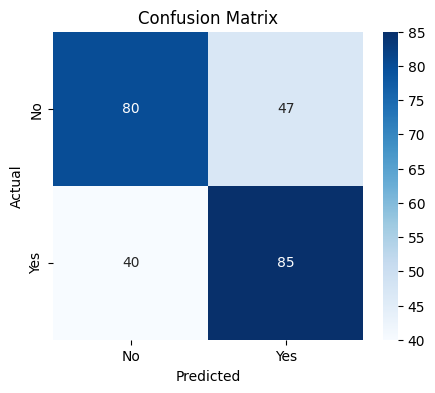

In [2240]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize it
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train Decision Tree Model
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)  # You can tune max_depth
dt_model.fit(X_train, y_train)

# Predictions
y_pred_dt = dt_model.predict(X_test)

# Model Performance
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))
